In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./datasets/social-media.csv')

In [4]:
df

,Timestamp,Age,Gender,"Major (Computer Science, Business, Engineering, etc.)",Hours Spent on Social Media per Day (Average),Primary Social Media Platform.,Frequency of Posting in social media,Number of Friends or Followers in social media,"Academic Performance: (categorical: Good, Average, Poor)."
0,12/13/2024 14:02:02,25,Male,Computer Science,3.0,Instagram,Rarely,8,Poor
1,12/13/2024 14:05:42,25,Male,Computer Science,3.0,Facebook,Rarely,30,Average
2,12/13/2024 14:07:30,24,Female,Computer Science,3.0,Facebook,Sometimes,600,Average
3,12/13/2024 14:13:50,25,Male,Computer Science,1.0,Facebook,Rarely,500,Poor
4,12/13/2024 14:17:34,24,Male,Computer Science,3.0,Facebook,Rarely,20,Average
...,...,...,...,...,...,...,...,...,...
1014,NaN,24,Male,CSE,2.0,Facebook,Never,1600,Good
1015,NaN,25,Male,CSE,2.0,Instagram,Sometimes,1700,Poor
1016,NaN,26,Male,CSE,1.0,Facebook,Never,800,Good
1017,NaN,25,Male,CSE,2.0,Facebook,Rarely,1300,Average


In [5]:
df.shape

(1019, 9)

In [6]:
df.drop('Timestamp', axis=1, inplace=True)

In [7]:
df.columns

Index(['Age', ' Gender  ',
       ' Major (Computer Science, Business, Engineering, etc.)   ',
       ' Hours Spent on Social Media per Day (Average)',
       ' Primary Social Media Platform.',
       ' Frequency of Posting in social media ',
       'Number of Friends  or Followers in social media',
       ' Academic Performance: (categorical: Good, Average, Poor).   '],
      dtype='object')

In [8]:
# statistical description of the numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1019.0,24.339549,3.501405,16.0,22.0,25.0,26.0,40.0
Hours Spent on Social Media per Day (Average),1019.0,3.082293,2.194245,0.0,1.5,2.9,4.0,13.0


Renaming Columns

In [9]:
df = df.rename(columns={"Age": "age"})
df = df.rename(columns={" Gender  ":"gender"})
df = df.rename(columns={" Major (Computer Science, Business, Engineering, etc.)   ": "major"})
df = df.rename(columns={" Hours Spent on Social Media per Day (Average)":"hours_per_day"})
df = df.rename(columns={" Primary Social Media Platform.":"primary_platform"})
df = df.rename(columns={" Frequency of Posting in social media ":"posting_frequency"})
df = df.rename(columns={"Number of Friends  or Followers in social media":"follower_count"})
df = df.rename(columns={" Academic Performance: (categorical: Good, Average, Poor).   ":"academic_performance"})

In [10]:
df.head()

,age,gender,major,hours_per_day,primary_platform,posting_frequency,follower_count,academic_performance
0,25,Male,Computer Science,3.0,Instagram,Rarely,8,Poor
1,25,Male,Computer Science,3.0,Facebook,Rarely,30,Average
2,24,Female,Computer Science,3.0,Facebook,Sometimes,600,Average
3,25,Male,Computer Science,1.0,Facebook,Rarely,500,Poor
4,24,Male,Computer Science,3.0,Facebook,Rarely,20,Average


### Analyzing the Categorical Variables

In [11]:
df['gender'].value_counts()

gender
Male      606
Female    401
1           5
Name: count, dtype: int64

In [12]:
df = df[df['gender'].isin(['Male', 'Female'])]

In [13]:
df['gender'].value_counts()

gender
Male      606
Female    401
Name: count, dtype: int64

In [14]:
df['major'].value_counts()

major
CSE                               237
Computer Science                  224
IT                                132
EEE                               111
Business                           49
Psychology                         44
Biology                            36
Mechanical                         31
Computer Science & Engineering     27
Arts                               21
Engineering                        20
CE                                 16
Textile                             6
BSAg                                5
BBA                                 3
Agriculture                         2
Social Work                         2
Education                           2
Computer Science                    1
Management                          1
Textile Engineering                 1
Finance                             1
Physics                             1
Information Technology              1
Engineering                         1
Bio-chemistry                       1
Chemis

In [15]:
df['major'] = df['major'].apply(lambda x: 'CSE' if x=='Computer Science & Engineering' else x)

In [16]:
df['major'] = df['major'].apply(lambda x: 'CSE' if x=='Computer Science' else x)

In [17]:
df['major'].value_counts()

major
CSE                               488
IT                                132
EEE                               111
Business                           49
Psychology                         44
Biology                            36
Mechanical                         31
Arts                               21
Engineering                        20
CE                                 16
Textile                             6
BSAg                                5
BBA                                 3
Agriculture                         2
Social Work                         2
Education                           2
Computer Science                    1
Management                          1
Textile Engineering                 1
Finance                             1
Physics                             1
Information Technology              1
Engineering                         1
Bio-chemistry                       1
Chemistry                           1
Nuclear Engineering                 1
Physic

Computer Science & Engineering and CSE are equivalent

In [18]:
import re

In [19]:
df.dropna(inplace=True)

In [20]:
df['follower_count'] = df['follower_count'].str.replace(r'\+', '', regex=True)
df['follower_count'] = df['follower_count'].str.replace(r'\,', '', regex=True).astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 1018
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   982 non-null    int64  
 1   gender                982 non-null    object 
 2   major                 982 non-null    object 
 3   hours_per_day         982 non-null    float64
 4   primary_platform      982 non-null    object 
 5   posting_frequency     982 non-null    object 
 6   follower_count        982 non-null    int64  
 7   academic_performance  982 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 69.0+ KB


In [22]:
df.posting_frequency.value_counts()

posting_frequency
Rarely       435
Sometimes    265
Never        123
Often         97
Daily         60
Always         2
Name: count, dtype: int64

In [23]:
df.posting_frequency = df.posting_frequency.apply(lambda x: 'Daily' if x=='Always' else x)

In [24]:
df.posting_frequency.value_counts()

posting_frequency
Rarely       435
Sometimes    265
Never        123
Often         97
Daily         62
Name: count, dtype: int64

In [25]:
df.academic_performance.value_counts()

academic_performance
Average    421
Good       326
Poor       235
Name: count, dtype: int64

In [26]:
df['primary_platform'] = df['primary_platform'].str.replace(r'\b(Whatsapp|WhatsApp)\s*\b', 'WhatsApp', regex=True)
df.primary_platform = df.primary_platform.apply(lambda x: 'X/Twitter' if x=='Twitter' else x)

In [27]:
df.primary_platform = df.primary_platform.apply(lambda x:'WhatsApp' if x=='WhatsApp ' else x)
df.primary_platform = df.primary_platform.apply(lambda x:'YouTube' if x=='Youtube' else x)

In [28]:
df.primary_platform.value_counts()

primary_platform
Facebook     413
Instagram    186
LinkedIn     138
X/Twitter    137
TikTok        55
Snapchat      48
WhatsApp       2
YouTube        2
Reddit         1
Name: count, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 1018
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   982 non-null    int64  
 1   gender                982 non-null    object 
 2   major                 982 non-null    object 
 3   hours_per_day         982 non-null    float64
 4   primary_platform      982 non-null    object 
 5   posting_frequency     982 non-null    object 
 6   follower_count        982 non-null    int64  
 7   academic_performance  982 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 69.0+ KB


### Univariate Distributions

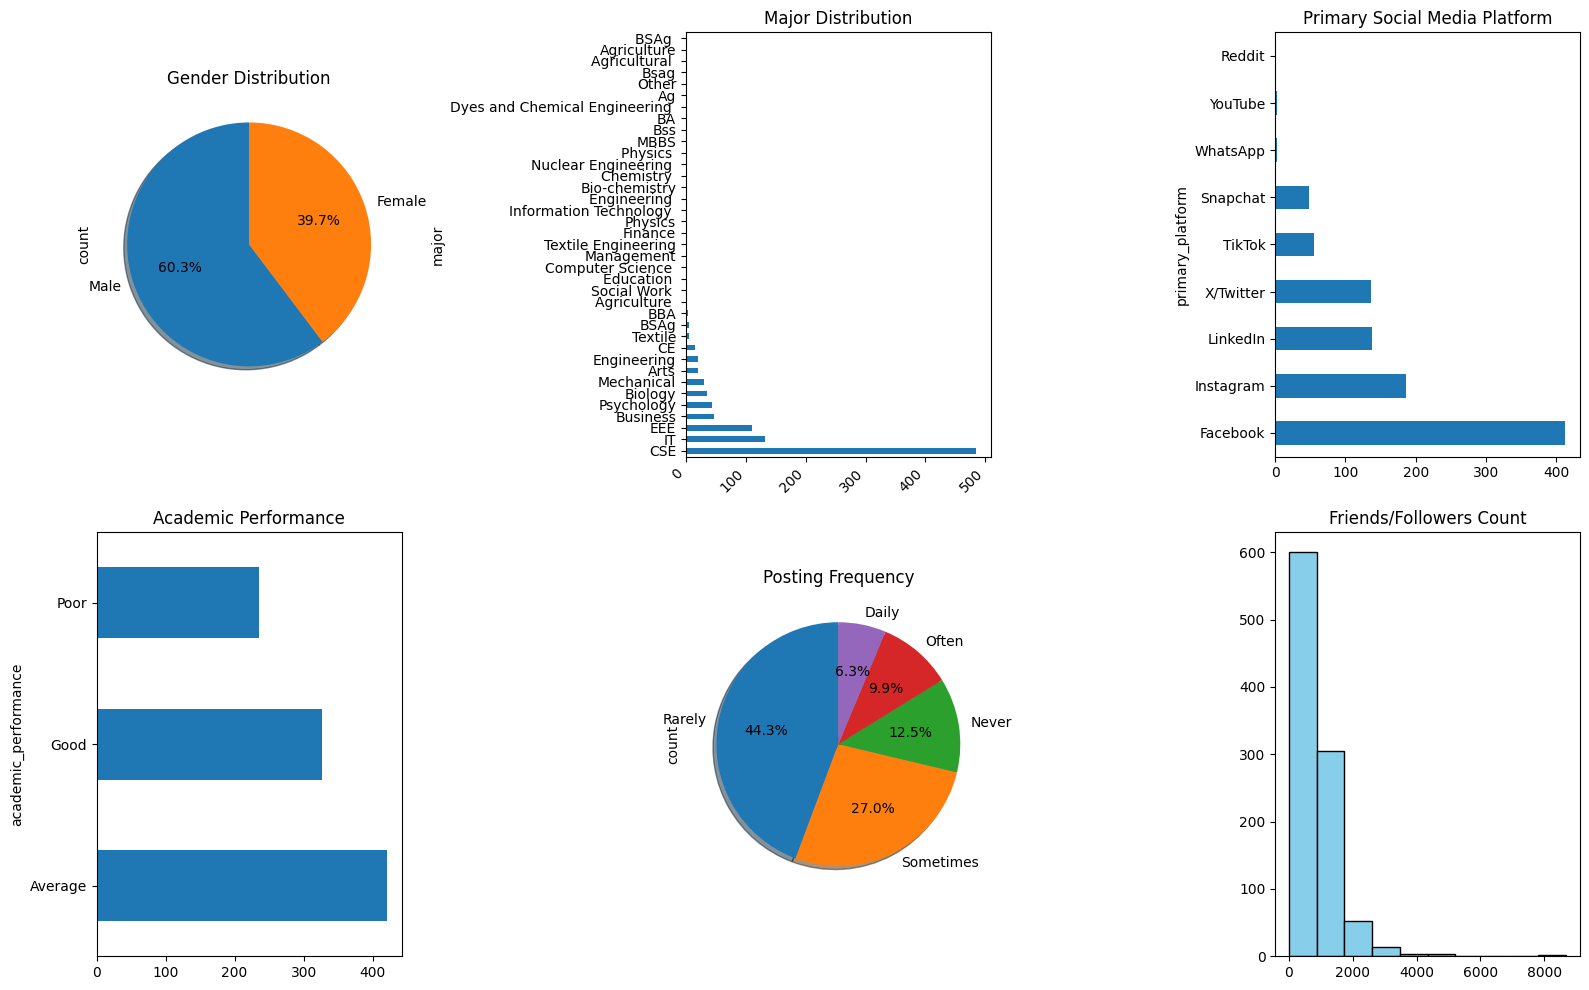

In [30]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 1)
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Gender Distribution')

# Major Distribution
plt.subplot(2, 3, 2)
df['major'].value_counts().plot(kind='barh')
plt.title('Major Distribution')
plt.xticks(rotation=45, ha='right')

# Primary Platform Distribution
plt.subplot(2, 3, 3)
df['primary_platform'].value_counts().plot(kind='barh')
plt.title('Primary Social Media Platform')

# Academic Performance Distribution
plt.subplot(2, 3, 4)
df['academic_performance'].value_counts().plot(kind='barh')
plt.title('Academic Performance')

# Posting Frequency Distribution
plt.subplot(2, 3, 5)
df['posting_frequency'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Posting Frequency')

#Friends/Followers
plt.subplot(2, 3, 6)
plt.hist(df['follower_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Friends/Followers Count')

plt.tight_layout()
plt.show()

Insights:
1. Gender Distribution: The dataset is male-dominated, with 89.7% males and only 10.3% females.
2. Major Distribution: A significant portion of students are in Computer Science, followed by CSE and fewer in IT and EEE.
3. Primary Social Media Platform: Facebook is the most popular platform (72.4%), while other platforms like LinkedIn, Twitter, and Instagram have much smaller shares.
4. Academic Performance: Most students perform at an Average level, with fewer showing Good or Poor performance.
5. Posting Frequency: A majority of students Rarely post (65.5%), while only 3.4% never post and very few post Always.
6. Numeric Distribution (Histogram): The distribution shows a right-skewed trend, indicating that most respondents have friends/followers in the lower range.

Social Media Hours and Friends/Followers vs Academic Performance

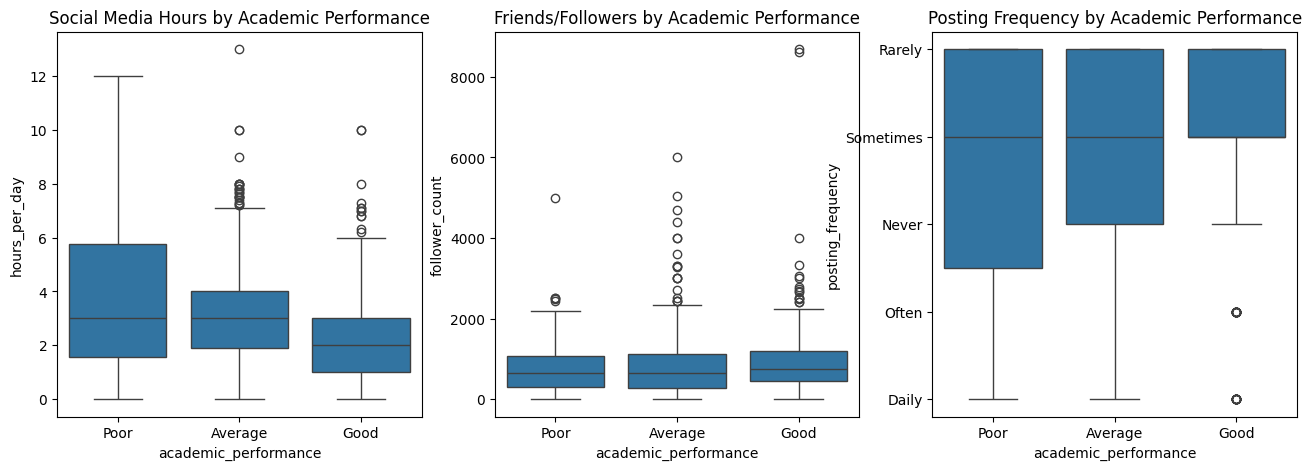

In [31]:
plt.figure(figsize=(16, 5))
# Social Media Hours vs Academic Performance
plt.subplot(1, 3, 1)
sns.boxplot(x='academic_performance', y='hours_per_day', data=df)
plt.title('Social Media Hours by Academic Performance')

# Friends/Followers vs Academic Performance
plt.subplot(1, 3, 2)
sns.boxplot(x='academic_performance', y='follower_count', data=df)
plt.title('Friends/Followers by Academic Performance')

# Posting Frequency vs Academic Performance
plt.subplot(1, 3, 3)
sns.boxplot(x='academic_performance', y='posting_frequency', data=df)
plt.title('Posting Frequency by Academic Performance')
plt.show()

Insights
1. Social Media Hours by Academic Performance: As academic performance improves, social media hours increase.
2. Friends/Followers by Academic Performance: As academic performance improves, the number of friends/followers increases.
3. Posting Frequency by Academic Performance: As academic performance improves, posting frequency shifts from "Rarely" to "Sometimes" and "Always".

Platform-wise Social Media Hours and Friends/Followers

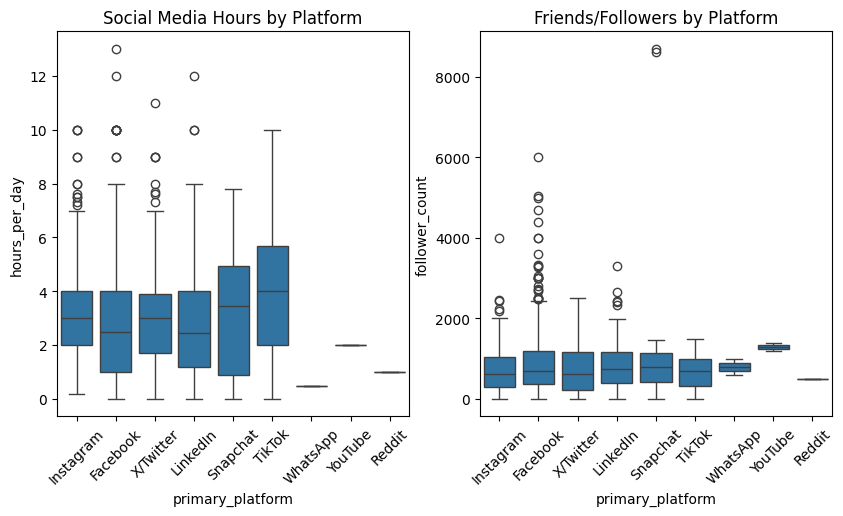

In [32]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='primary_platform', y='hours_per_day', data=df)
plt.title('Social Media Hours by Platform')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.boxplot(x='primary_platform', y='follower_count', data=df)
plt.title('Friends/Followers by Platform')
plt.xticks(rotation=45)
plt.show()

Insights: 

1. Social Media Hours by Platform: Users spend the most time on LinkedIn, followed by Twitter, Facebook, and Instagram.
2. Friends/Followers by Platform: LinkedIn has the highest number of friends/followers, followed by Facebook, Twitter, and Instagram.

Combined Analysis of All Numerical Features (PairPlot)

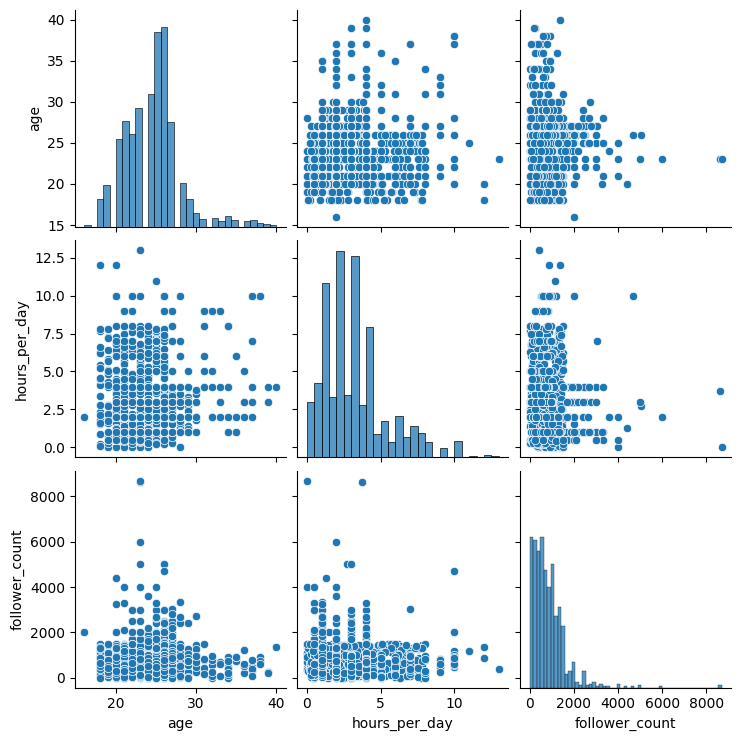

In [33]:
sns.pairplot(df, vars=df[['age', 'hours_per_day', 'follower_count']], kind='scatter', diag_kind='hist')
plt.show()

In [34]:
num_values = ['age', 'hours_per_day', 'follower_count']
correlation = df[num_values].corr()

In [35]:
correlation['age']

age               1.000000
hours_per_day     0.066783
follower_count    0.011627
Name: age, dtype: float64

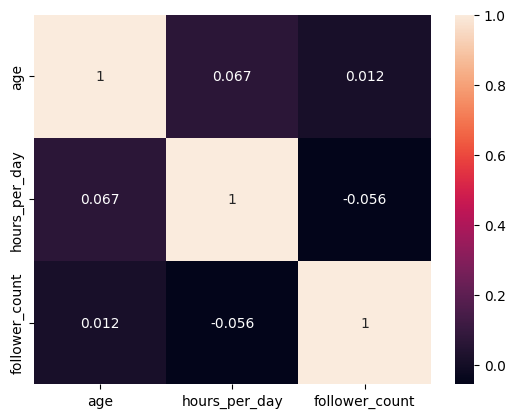

In [36]:
sns.heatmap(correlation, annot=True)
plt.show()

No meaningful correlation found

### SUMMARY

The majority of the respondents primarily use Facebook. They spend most time on LinkedIn.

# Clustering Analysis

*Handling inconsistencies in data*

In [37]:
df.columns

Index(['age', 'gender', 'major', 'hours_per_day', 'primary_platform',
       'posting_frequency', 'follower_count', 'academic_performance'],
      dtype='object')

Removing Duplicate and Null values

In [38]:
df.isnull().sum()

age                     0
gender                  0
major                   0
hours_per_day           0
primary_platform        0
posting_frequency       0
follower_count          0
academic_performance    0
dtype: int64

In [39]:
df.duplicated().sum()

np.int64(16)

In [40]:
df.dropna(inplace=True)

In [41]:
df.drop_duplicates(inplace=True)

*Saving Cleaned Dataset*

In [42]:
df.to_csv('cleaned_dataset/social_media_cleaned.csv', index=False)

*Outlier Removal*

In [883]:
# remove numerical values using IQR method
def remove_outlier(column_name, df=df):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [884]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 0 to 1018
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   966 non-null    int64  
 1   gender                966 non-null    object 
 2   major                 966 non-null    object 
 3   hours_per_day         966 non-null    float64
 4   primary_platform      966 non-null    object 
 5   posting_frequency     966 non-null    object 
 6   follower_count        966 non-null    int64  
 7   academic_performance  966 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 67.9+ KB


In [885]:
df = remove_outlier('age')
df = remove_outlier('hours_per_day')
df = remove_outlier('follower_count')

In [886]:
df.age.min()

np.int64(16)

<Axes: xlabel='age'>

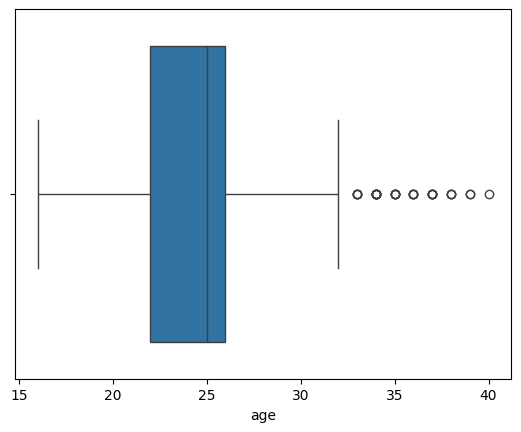

In [887]:
sns.boxplot(x=df["age"])

In [888]:
df.age.max()

np.int64(40)

In [889]:
# df['Major'].value_counts()<10
# filter out majors with count less than 10

valid_majors = df['major'].value_counts()[df['major'].value_counts() >= 10].index
df = df[df['major'].isin(valid_majors)]

In [890]:
df.major.value_counts()

major
CSE            453
IT             121
EEE            105
Business        46
Psychology      44
Biology         36
Mechanical      30
Arts            21
Engineering     20
CE              14
Name: count, dtype: int64

In [891]:
valid_platforms = df['primary_platform'].value_counts()[df['primary_platform'].value_counts() >= 5].index
df = df[df['primary_platform'].isin(valid_platforms)]

In [892]:
df.primary_platform.value_counts()

primary_platform
Facebook     350
Instagram    176
X/Twitter    130
LinkedIn     128
TikTok        55
Snapchat      46
Name: count, dtype: int64

In [893]:
valid_frequency = df['posting_frequency'].value_counts()[df['posting_frequency'].value_counts() >= 5].index
df = df[df['posting_frequency'].isin(valid_frequency)]

In [894]:
df.posting_frequency.value_counts()

posting_frequency
Rarely       406
Sometimes    230
Never        111
Often         86
Daily         52
Name: count, dtype: int64

*Standardizing Data*

In [895]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [896]:
# standard_scaler = StandardScaler()
# min_max_scaler = MinMaxScaler()

In [897]:
# df.age = standard_scaler.fit_transform(df[['age']])

In [898]:
# df.follower_count = min_max_scaler.fit_transform(df[['follower_count']])

*One-hot encoding the categorical variables*

In [899]:
df = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = ['gender', 'major', 'primary_platform'],
               drop_first =True,
              dtype='int8')

In [900]:
df.head()

,age,hours_per_day,posting_frequency,follower_count,academic_performance,OHE_Male,OHE_Biology,OHE_Business,OHE_CE,OHE_CSE,OHE_EEE,OHE_Engineering,OHE_IT,OHE_Mechanical,OHE_Psychology,OHE_Instagram,OHE_LinkedIn,OHE_Snapchat,OHE_TikTok,OHE_X/Twitter
0,25,3.0,Rarely,8,Poor,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,25,3.0,Rarely,30,Average,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,24,3.0,Sometimes,600,Average,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,25,1.0,Rarely,500,Poor,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24,3.0,Rarely,20,Average,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Label Encoding the Ordinal Variables

In [901]:
ap_map = {'Poor': 0, 'Average': 1, 'Good': 2}

df['academic_performance'] = df['academic_performance'].map(ap_map)
df.head()

,age,hours_per_day,posting_frequency,follower_count,academic_performance,OHE_Male,OHE_Biology,OHE_Business,OHE_CE,OHE_CSE,OHE_EEE,OHE_Engineering,OHE_IT,OHE_Mechanical,OHE_Psychology,OHE_Instagram,OHE_LinkedIn,OHE_Snapchat,OHE_TikTok,OHE_X/Twitter
0,25,3.0,Rarely,8,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,25,3.0,Rarely,30,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,24,3.0,Sometimes,600,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,25,1.0,Rarely,500,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24,3.0,Rarely,20,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [902]:
df['posting_frequency'].value_counts()

posting_frequency
Rarely       406
Sometimes    230
Never        111
Often         86
Daily         52
Name: count, dtype: int64

In [903]:
pf_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Daily': 4}

df['posting_frequency'] = df['posting_frequency'].map(pf_map)
df.head()

,age,hours_per_day,posting_frequency,follower_count,academic_performance,OHE_Male,OHE_Biology,OHE_Business,OHE_CE,OHE_CSE,OHE_EEE,OHE_Engineering,OHE_IT,OHE_Mechanical,OHE_Psychology,OHE_Instagram,OHE_LinkedIn,OHE_Snapchat,OHE_TikTok,OHE_X/Twitter
0,25,3.0,1,8,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,25,3.0,1,30,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,24,3.0,2,600,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,25,1.0,1,500,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24,3.0,1,20,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [904]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

In [905]:
from sklearn.metrics import davies_bouldin_score

*DBSCAN*

In [906]:
db = DBSCAN(eps=15, min_samples=3).fit(df)
labels = db.labels_

In [907]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [908]:
n_clusters_

11

In [909]:
labels

array([ 0,  0,  1,  1,  0,  2,  2,  0,  1,  0,  1,  1,  1,  1,  0,  2,  1,
        1,  3,  0,  1,  1,  0,  0,  3,  1,  0,  1,  1,  2,  3,  1,  1,  1,
        1,  4,  0,  0,  1,  2,  1,  5,  0,  2,  2,  1,  1,  0,  1,  1,  1,
        0,  2,  1,  0,  0,  1,  1,  3,  1,  0,  2,  1,  1,  1,  0,  2,  0,
        1,  1,  4,  1,  1,  1,  1,  3,  1,  0,  1,  1,  0,  0,  2,  1,  0,
        0,  1,  1,  3,  0,  2,  1,  1,  1,  4,  1,  0,  1,  0,  1,  2,  1,
        1,  3,  3,  1,  0,  1,  2,  0,  2,  0,  3,  3,  1,  1,  3,  0,  0,
        2,  0,  1,  2,  0,  1,  1,  2,  1,  2,  2,  0,  3,  2,  3,  3,  3,
        1,  0,  1,  1,  3,  1,  3,  2,  3,  3,  1,  3,  2,  0,  0,  3,  3,
        1,  0,  0,  1,  1,  2,  1,  3,  1,  1,  1,  2,  2,  1,  0,  2,  2,
        2,  0,  2,  1,  3,  0,  0,  1,  2,  0,  3,  2,  1,  1,  0,  1,  1,
        3,  0,  1,  2,  1,  1,  1,  3,  1,  0,  1,  3,  2,  1,  2,  3,  0,
        0,  2,  1,  1,  2,  3,  1,  1,  2,  3,  1,  2,  1,  1,  0,  0,  1,
        3,  2,  1,  1,  1

In [910]:
from sklearn.metrics import silhouette_score

In [911]:
silhouette_score(df, labels)

np.float64(0.469801774563794)

In [912]:
davies_bouldin_score(df, labels)

np.float64(3.138042329658941)

*K-MEANS*

In [913]:
from sklearn.cluster import KMeans

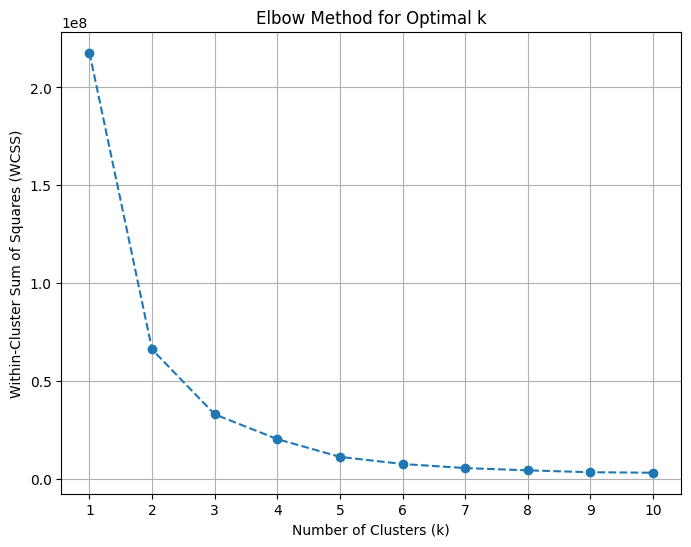

In [914]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()
plt.show()

From the elbow method, we can see 3, 4, and 5 are around the elbow

In [925]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(df)
kmeans.labels_

array([0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 3, 0, 0, 2, 1, 0, 3, 0, 2,
       1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0,
       1, 0, 2, 0, 3, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       1, 0, 1, 0, 2, 0, 3, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0,
       1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 0,
       2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2,
       1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 2, 2, 3, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 3, 1, 3, 1, 3, 3, 1,
       1, 0, 3, 3, 2, 2, 3, 1, 3, 2, 2, 3, 1, 2, 2,

In [926]:
silhouette_score(df, kmeans.labels_)

np.float64(0.559690264740524)

In [927]:
davies_bouldin_score(df, kmeans.labels_)

np.float64(0.49939603828553486)

Trying with different values of n_clusters, we find that 2 clusters provide the best results. This makes sense because although many features have 3 different categories and based on their values they may form 3 different clusters, majority of the data takes on only 2 values among those 3 categories.

#### Dimensionality Reduction using PCA

*2D visualization*

In [918]:
from sklearn.decomposition import PCA

In [919]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

In [920]:
pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])

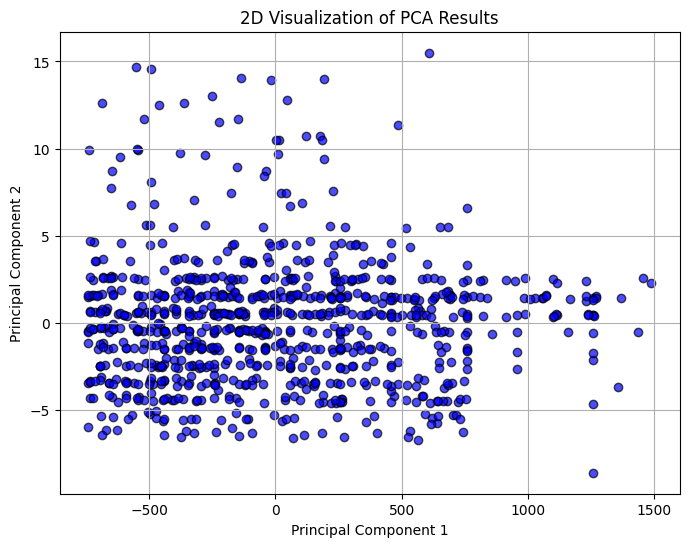

In [921]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PCA1"], pca_df["PCA2"], c='blue', edgecolor='k', alpha=0.7)
plt.title("2D Visualization of PCA Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In this 2d viusualization, we see that no distinct cluster is formed. There are several outliers. Some grouping can be seen at the left half of the plot, indicating the possibility of 1 or more clusters here.

*3d Visualization*

In [922]:
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(df)

In [923]:
pca_df_3d = pd.DataFrame(pca_result_3d, columns=["PCA1", "PCA2", "PCA3"])

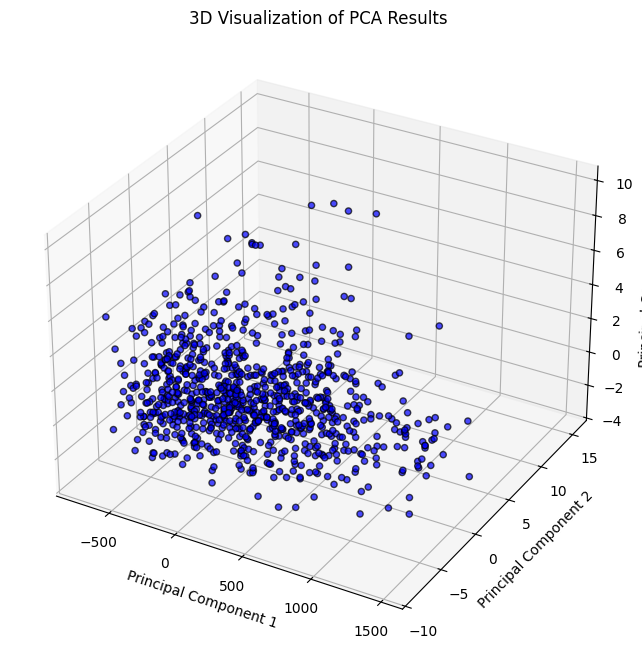

In [924]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter plot
sc = ax.scatter(pca_df_3d["PCA1"], pca_df_3d["PCA2"], pca_df_3d["PCA3"], 
                c='blue', edgecolor='k', alpha=0.7)

ax.set_title("3D Visualization of PCA Results")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()

Similar observations can be made here, no clearly distinct cluster can be found.

## Summary